# Homework 1. MNIST 데이터셋을 활용해 다중 분류 수행하기
### 과목코드: 2150085101
### 팀명: 4조
### 팀장: 20202995 장진영
### 팀원: 20201571 강현준
### 팀원: 20201601 이시호

#### 문제. 아래의 `코드`를 완성하고, 그에 대한 `분석`을 작성하시오.

1. (코드) MNIST 데이터셋 받기
   - (분석) 데이터셋에 대해 분석하기

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score

2. (코드) 데이터셋을 train / validation / test set 으로 분할하기
   - (분석) 데이터셋을 분할한 방식에 대해 설명하고, 해당 분할 방식을 수행한 이유에 대해 설명하기

<h1> 데이터셋 분할 방식 설명</h1>
훈련에 사용되는 데이터 양이 충분히 많아야 하기 때문에 70000개의 데이터 중 60000개의 데이터를 training set으로, 10000개의 데이터를 test set으로 분할하였습니다. <br>
또한, Training data 중에서 90:10 비율로(Training data : Validation data)로 분할하였는데. 이는 MNIST같은 대규모 데이터셋에서 일반적으로 사용하는 분할 비율을 사용하였습니다.

In [3]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist['data'], mnist['target'].astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

3. (코드) 특성 스케일링을 이용한 데이터셋 전처리하기
   - (분석) 스케일링을 수행한 방식에 대해 설명하고, 해당 스케일링을 수행한 이유에 대해 설명하기

In [6]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_split)
X_val_scaled = scaler.transform(X_val_split)
X_test_scaled = scaler.transform(X_test)


<h1> Min-Max Scaling 선택 이유 </h1>

MNIST의 픽셀 값은 0 ~ 255 범위 사이에서 표현됩니다. 따라서 이상치가 많지 않고 데이터 분포가 크게 편향되어 있지 않기 때문에 Min-MAx Scaling을 사용했습니다.


4. (코드) 모델 선택하기
   - (분석) 머신러닝 모델의 후보군들에 대해 설명하고, 후보군들 중 특정 모델이 대표 모델로 선택된 이유에 대해 설명하기

머신러닝 모델중 다층퍼셉트론 모델은 비선형적인 데이터에 대해 학습을 할 수 있기 때문에 이미지,음성,텍스트 등 여러 분야에 활용되는데 해당 모델과 수업시간에 배운 확률적 경사 하강 모델(SGD) 랜덤포레스트 모델(RandomForeset),결정트리 모델(DecisionTree)과 비교하였습니다.


In [14]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train_scaled, y_train_split)
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train_scaled, y_train_split)
decision_clf = DecisionTreeClassifier(random_state=42)
decision_clf.fit(X_train_scaled, y_train_split)
multilayerperceptron_clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
multilayerperceptron_clf.fit(X_train_scaled,y_train_split)


MLPClassifier(max_iter=500, random_state=42)

In [26]:

### validation
sgd_val_score = sgd_clf.score(X_val_scaled, y_val_split)
forest_val_score = forest_clf.score(X_val_scaled, y_val_split)
decision_val_score = decision_clf.score(X_val_scaled, y_val_split)
multilayer_val_score = multilayerperceptron_clf.score(X_val_scaled, y_val_split)
print(f"[SGD]  Validation Accuracy: {sgd_val_score:.4f}")
print(f"[RF]   Validation Accuracy: {forest_val_score:.4f}")
print(f"[DT]   Validation Accuracy: {decision_val_score:.4f}")
print(f"[MULT] Validation Accuracy: {multilayer_val_score:.4f}")

### Test
sgd_test_score = sgd_clf.score(X_test_scaled, y_test)
forest_test_score = forest_clf.score(X_test_scaled, y_test)
decision_test_score = decision_clf.score(X_test_scaled, y_test)
multilayer_test_score = multilayerperceptron_clf.score(X_test_scaled, y_test)
print(f"[SGD]   Test Accuracy: {sgd_test_score:.4f}")
print(f"[RF]    Test Accuracy: {forest_test_score:.4f}")
print(f"[DT]    Test Accuracy: {decision_test_score:.4f}")
print(f"[MULT]  Test Accuracy: {multilayer_test_score:.4f}")

[SGD]  Validation Accuracy: 0.9148
[RF]   Validation Accuracy: 0.9720
[DT]   Validation Accuracy: 0.8715
[MULT] Validation Accuracy: 0.9802
[SGD]   Test Accuracy: 0.9122
[RF]    Test Accuracy: 0.9689
[DT]    Test Accuracy: 0.8734
[MULT]  Test Accuracy: 0.9781


다층 퍼셉트론 모델이 다른 모델보다 Validation Set과 Train Set의 score를 확인하였을때
가장 score가 높음을 알 수 있습니다.

5. (코드) 성능 평가하기
   - (분석) 최종적으로 학습된 모델을 이용해 test set 에 대한 성능을 정리하고, 이를 분석하기

In [52]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = multilayerperceptron_clf.predict(X_test)
mtx_cf = confusion_matrix(y_test, y_pred)

In [54]:
print('Confution Matrix: \n', mtx_cf)

print('Number of Samples: \t  ',    f'{mtx_cf.sum():5d}',    f'({mtx_cf.sum() / mtx_cf.sum() * 100:6.2f}%)')
print('Number of Negative Labels:', f'{mtx_cf[0].sum():5d}', f'({mtx_cf[0].sum() / mtx_cf.sum() * 100:6.2f}%)')
print('Number of Positive Labels:', f'{mtx_cf[1].sum():5d}', f'({mtx_cf[1].sum() / mtx_cf.sum() * 100:6.2f}%)')

Confution Matrix: 
 [[ 975    0    0    1    1    0    1    1    1    0]
 [   0 1125    3    1    0    0    1    1    4    0]
 [   5    4 1003    2    0    0    5    5    7    1]
 [   1    0    4  992    0    2    0    4    0    7]
 [   2    1    1    1  954    0    4    5    2   12]
 [   3    1    0   15    3  855    7    1    2    5]
 [   5    2    1    1    3    2  943    0    1    0]
 [   0    4    6    2    2    0    0 1006    4    4]
 [   6    1    2   10    5    4    2    4  937    3]
 [   3    2    0    5    5    4    0    5    2  983]]
Number of Samples: 	   10000 (100.00%)
Number of Negative Labels:   980 (  9.80%)
Number of Positive Labels:  1135 ( 11.35%)


In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
TN = mtx_cf[0, 0]
FP = mtx_cf[0, 1]
FN = mtx_cf[1, 0]
TP = mtx_cf[1, 1]

func_acc = lambda mtx_cf: (mtx_cf[0, 0] + mtx_cf[1, 1]) / (mtx_cf[0, 0] + mtx_cf[0, 1] + mtx_cf[1, 0] + mtx_cf[1, 1])
func_pre = lambda mtx_cf: (mtx_cf[1, 1]) / (mtx_cf[0, 1] + mtx_cf[1, 1])
func_rec = lambda mtx_cf: (mtx_cf[1, 1]) / (mtx_cf[1, 0] + mtx_cf[1, 1])
func_spe = lambda mtx_cf: (mtx_cf[0, 0]) / (mtx_cf[0, 0] + mtx_cf[0, 1])
func_f1 = lambda precision, recall: 2 * (precision * recall) / (precision + recall)

acc = accuracy_score(y_train_split,y_train_pred)
prec = precision_score(y_train_split,y_train_pred,average='weighted')
recall = recall_score(y_train_split,y_train_pred,average='weighted')
f1 = f1_score(y_train_split,y_train_pred,average='weighted')

acc_ = func_acc(mtx_cf)
prec_ = func_pre(mtx_cf)
recall_ = func_rec(mtx_cf)
f1_ = func_f1(prec_, recall_)

spe_ = func_spe(mtx_cf)


print(f"Metrics:      Function ~ Confusion")
print(f"Accuracy:\t{acc:.5f} ~ {acc_:.4f}")
print(f"Precision:\t{prec:.5f} ~ {prec_:.4f}")
print(f"Recall:\t\t{recall:.5f} ~ {recall_:.4f}")
print(f"F1:\t\t{f1:.5f} - {f1_:.4f}")

Metrics:      Function ~ Confusion
Accuracy:	0.97220 ~ 1.0000
Precision:	0.97220 ~ 1.0000
Recall:		0.97220 ~ 1.0000
F1:		0.97219 - 1.0000


6. (코드) 에러 분석하기
   - (분석) 최종적으로 학습된 모델의 에러를 분석하기
   - (분석) `5. 성능 평가하기` 의 분석과 연관지어 에러를 분석하고 해결책을 제안하기

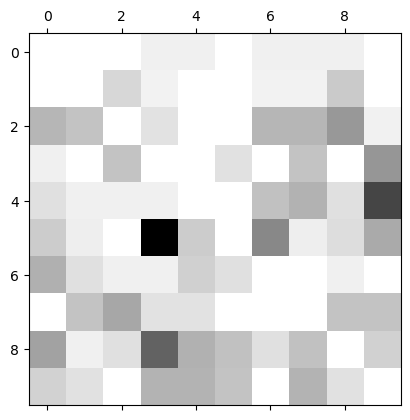

In [59]:
row_sums = mtx_cf.sum(axis=1, keepdims=True)
norm_conf_mx = mtx_cf / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap='binary')
plt.show()

위 그림은 MLP의 오차행렬을 나타낸 행렬입니다.

해당 행렬을 통해 (Label,Prediction) = (5,3) (4,9) (8,3) 부분이 가장 색이 어두운걸 확인할 수 있습니다.

해당 부분들을 시각화하여 표현하겠습니다.

In [61]:
# EXTRA plot functions for multiple digit instances
def plot_digits(instances, images_per_row=10, **options):
  size = 28
  images_per_row = min(len(instances), images_per_row)
  images = [instance.reshape(size,size) for instance in instances]
  n_rows = (len(instances) - 1) // images_per_row + 1
  row_images = []
  n_empty = n_rows * images_per_row - len(instances)
  images.append(np.zeros((size, size * n_empty)))
  for row in range(n_rows):
    rimages = images[row * images_per_row : (row + 1) * images_per_row]
    row_images.append(np.concatenate(rimages, axis=1))
  image = np.concatenate(row_images, axis=0)
  plt.imshow(image, cmap = mpl.cm.gray, **options)
  plt.axis("off")

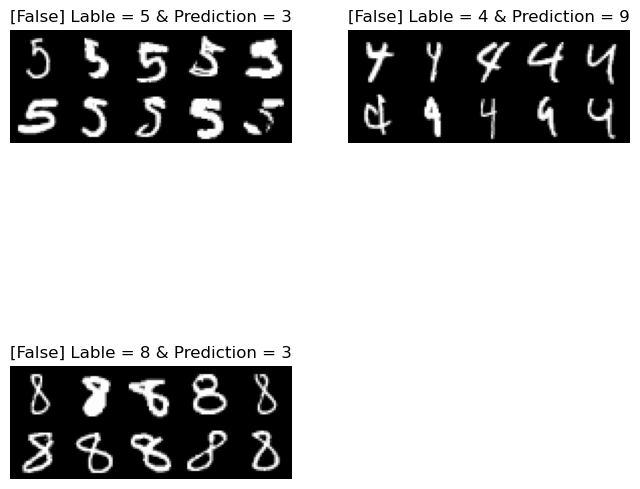

In [92]:
import matplotlib as mpl
import matplotlib.pyplot as plt  # 그래프를 그리기 위한 pyplot 모듈을 plt로 불러옴
cls_3,cls_5,cls_8,cls_9 = 3,5,8,9
X_53 = X_train_split[(y_train_split == cls_5) & (y_train_pred == cls_3)]
X_49 = X_train_split[(y_train_split == cls_4) & (y_train_pred == cls_9)]
X_83 = X_train_split[(y_train_split == cls_8) & (y_train_pred == cls_3)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_53[:10], images_per_row=5); plt.title('[False] Lable = 5 & Prediction = 3');
plt.subplot(222); plot_digits(X_49[:10], images_per_row=5); plt.title('[False] Lable = 4 & Prediction = 9');
plt.subplot(223); plot_digits(X_83[:10], images_per_row=5); plt.title('[False] Lable = 8 & Prediction = 3');

잘못 예측한 그림들을 중에 Lable = 5를 확인하면 숫자가 중간에 끊기거나 휘갈겨서 실제로 3처럼 보이는 숫자도 보입니다.

Lable = 4 를 확인하였을 때 9처럼 보이는 숫자들도 확인할 수 있는데

해당 숫자들의 데이터를 없애는 방식으로 에러를 개선할 수 있을것 같습니다.



참고자료

다중퍼셉트론모델

 https://mozenworld.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%EB%AA%A8%EB%8D%B8-%EC%86%8C%EA%B0%9C-6-%EB%8B%A4%EC%B8%B5-%ED%8D%BC%EC%85%89%ED%8A%B8%EB%A1%A0-Multilayer-Perceptron


MLP 사용법

 https://scikit-learn.org/dev/modules/generated/sklearn.neural_network.MLPClassifier.html
